<a href="https://colab.research.google.com/github/Kikkas01/Python-for-analytics/blob/Final_project/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1
Скачать данные о рынке недвижимости c открытого соревнования Сбербанка по
машинному обучению https://www.kaggle.com/c/sberbank-russian-housing-market/data.
Скачиваем только файлы train.csv.zip, macro.csv.zip и сливаем в один датафрейм.
Описание колонок - data_dictionary.txt

In [1]:
import pandas as pd
import zipfile
import numpy as np

In [2]:
macro = pd.read_csv("macro.csv.zip")
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,...,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,42.9600,80.59,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [3]:
macro.shape

(2484, 100)

In [4]:
archive = zipfile.ZipFile("train.csv.zip")
archive.namelist()

['train.csv', '__MACOSX/', '__MACOSX/._train.csv']

In [5]:
train = pd.read_csv(archive.open("train.csv"))
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [6]:
train.shape

(30471, 292)

Будем сливать в единый датафрейм по дате транзакции (timestamp)

In [7]:
macro['timestamp'] = pd.to_datetime(macro['timestamp'])
train['timestamp'] = pd.to_datetime(train['timestamp'])
df = train.merge(macro, on = 'timestamp', how = 'inner')
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,136.11,77.93,62.89,47.85,41.80,36.77,29.07,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,99.5,43.9,95.7,55.3,99.9,0.3,75.79,6.2,5.53,715.1,155.22,94.02,66.28,51.15,44.25,37.73,30.63,793.319561,#!,1391.710938,89.0495,NaN,NaN,65.9,99.6,8180.755454,375.8,846.0,302.0,741.0,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


In [8]:
df.info(verbose = True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Data columns (total 391 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   id                                          30471 non-null  int64         
 1   timestamp                                   30471 non-null  datetime64[ns]
 2   full_sq                                     30471 non-null  int64         
 3   life_sq                                     24088 non-null  float64       
 4   floor                                       30304 non-null  float64       
 5   max_floor                                   20899 non-null  float64       
 6   material                                    20899 non-null  float64       
 7   build_year                                  16866 non-null  float64       
 8   num_room                                    20899 non-null  float64       
 9   kitch

# Задание 2
Провести чистку данных (пропуски данных, неинформативные признаки, аномалии,
оцифровка текстовых столбцов и т.п.)

Выясним, сколько в среднем пустых значений содержится в столбцах датафрейма:

In [9]:
pd.set_option("display.max_rows", 1000)
df.isna().mean().sort_values(ascending = False)

provision_retail_space_modern_sqm             0.975288
provision_retail_space_sqm                    0.816481
students_reg_sports_share                     0.554659
museum_visitis_per_100_cap                    0.554659
theaters_viewers_per_1000_cap                 0.554659
load_of_teachers_preschool_per_teacher        0.554659
hospital_beds_raion                           0.473926
build_year                                    0.446490
state                                         0.444980
cafe_sum_500_max_price_avg                    0.435857
cafe_sum_500_min_price_avg                    0.435857
cafe_avg_price_500                            0.435857
material                                      0.314135
kitch_sq                                      0.314135
num_room                                      0.314135
max_floor                                     0.314135
preschool_quota                               0.219487
school_quota                                  0.219389
cafe_avg_p

Уберем столбцы, где пустых значений больше половины:

In [10]:
del_list = []
for col in df.columns:
    if df[col].isna().mean() >= 0.5:
        del_list.append(col)
del_list

['load_of_teachers_preschool_per_teacher',
 'provision_retail_space_sqm',
 'provision_retail_space_modern_sqm',
 'theaters_viewers_per_1000_cap',
 'museum_visitis_per_100_cap',
 'students_reg_sports_share']

In [11]:
df = df.drop(columns=del_list, axis=1)

Проверим датафрейм на дубликаты и пропуски в целевой переменной:

In [12]:
df.duplicated().sum()

0

In [13]:
df['price_doc'].isna().sum()

0

Удалим колонки, содержащие не информативные значения (идентификаторы):

In [14]:
id_col = ['id']
for i in df.columns:
    if i[:2] == 'ID':
        id_col.append(i)
id_col

['id',
 'ID_metro',
 'ID_railroad_station_walk',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal']

In [15]:
df = df.drop(id_col, axis=1)

Посмотрим содержание столбцов, содержащих данные с типом object и попробуем их 
нормализовать

In [16]:
for column in df.select_dtypes(include='object'):
    print(column)
    print('number_of_unique_values', df[column].nunique())
    print("===============================")
    print(df[column].unique())
    print("===============================")

product_type
number_of_unique_values 2
['Investment' 'OwnerOccupier']
sub_area
number_of_unique_values 146
['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Basmannoe'
 'Nizhegorodskoe' "Sokol'niki" 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe'
 'Zapadnoe Degunino' 'Presnenskoe' 'Lefortovo' "Mar'ino" "Kuz'minki"
 'Nagornoe' "Gol'janovo" 'Vnukovo' 'Juzhnoe Tushino' 'Severnoe Tushino'
 "Chertanovo Central'noe" 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino'
 'Bogorodskoe' 'Jaroslavskoe' 'Strogino' 'Hovrino' "Moskvorech'e-Saburovo"
 'Staroe Krjukovo' 'Ljublino' 'Caricyno' 'Veshnjaki' 'Danilovskoe'
 'Preobrazhenskoe' "Kon'kovo" 'Brateevo' 'Vostochnoe Izmajlovo'
 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo' 'Rostokino'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Babushkinskoe'
 'Pokrovskoe Streshnevo' 'Obruchevskoe' 'Filevskij Park'
 'Troparevo-Ni

Бинарные значения yes/no заменим на 1/0, также нормализуем данные, где это возможно:

In [17]:
bins = ['culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion',\
        'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line',\
        'railroad_1line']
df[bins] = df[bins].applymap(lambda x : 1 if x == 'yes' else 0)

In [18]:
dic = {'excellent': 4, 'good': 3, 'satisfactory': 2, 'poor' :1 , 'no data': np.nan}
df['ecology'] = df['ecology'].map(dic)

In [19]:
df['child_on_acc_pre_school'] = df['child_on_acc_pre_school'].apply(lambda x : np.nan if x == '#!' else x)

In [20]:
dic = {'Investment': 1, 'OwnerOccupier' : 0}
df['product_type'] = df['product_type'].map(dic)

Проанализируем количество записей по разным районам и оптимизируем их:

In [21]:
df2 = df['sub_area'].value_counts()
df2.head()

Poselenie Sosenskoe        1776
Nekrasovka                 1611
Poselenie Vnukovskoe       1372
Poselenie Moskovskij        925
Poselenie Voskresenskoe     713
Name: sub_area, dtype: int64

In [22]:
q = [0, 1/4, 1/2, 3/4, 1]
df2.quantile(q=q)
# исходя из полученной разбивки по квантилям, видим, что основное количество 
# интересующих нас данных содержится в зоне 100+ 

0.00       1.00
0.25      98.25
0.50     154.50
0.75     223.00
1.00    1776.00
Name: sub_area, dtype: float64

In [23]:
lst3 = (df['sub_area'].value_counts() >= 100).loc[lambda x: x == True].index.tolist()
# заменим названия районов, где менее 100 записей, на Other

In [24]:
df['sub_area']  = np.where(df['sub_area'].isin(lst3), df['sub_area'], 'Other')

In [25]:
for column in df.select_dtypes(include='object'):
    print(column)
    print('number_of_unique_values', df[column].nunique())
    print("===============================")
    print(df[column].unique())
    print("===============================")

sub_area
number_of_unique_values 109
['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Other'
 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe' 'Zapadnoe Degunino' 'Presnenskoe'
 'Lefortovo' "Mar'ino" "Kuz'minki" 'Nagornoe' "Gol'janovo"
 'Juzhnoe Tushino' 'Severnoe Tushino' "Chertanovo Central'noe"
 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino' 'Bogorodskoe'
 'Jaroslavskoe' 'Strogino' 'Hovrino' 'Ljublino' 'Caricyno' 'Veshnjaki'
 'Danilovskoe' 'Preobrazhenskoe' "Kon'kovo" 'Brateevo'
 'Vostochnoe Izmajlovo' 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo'
 'Juzhnoe Butovo' 'Izmajlovo' 'Severnoe Medvedkovo'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Babushkinskoe'
 'Pokrovskoe Streshnevo' 'Obruchevskoe' 'Filevskij Park'
 'Troparevo-Nikulino' 'Severnoe Butovo' 'Solncevo' 'Timirjazevskoe'
 'Lianozovo' 'Pechatniki' 'Krjukovo' 'Jasenevo' 'Chertanovo Severnoe'
 'Rjazanskij' 'Silino' 'Ivanovskoe' 'Golovinskoe' 'Novokosino'


Посмотрим еще раз все столбцы, содержащие пропуски и подумаем, чем их по возможности можно заполнить:


In [26]:
none_list = []
for col in df.columns:
    if df[col].isna().mean() > 0:
        none_list.append(col)
none_list


['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ecology',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_

Пропуски в данных по жилой площади и площади кухни заполним расчетными значениями:

In [27]:
df[['full_sq', 'life_sq', 'kitch_sq']].isna().sum()

full_sq        0
life_sq     6383
kitch_sq    9572
dtype: int64

In [28]:
df[['full_sq', 'life_sq', 'kitch_sq']].describe()

,full_sq,life_sq,kitch_sq
count,30471.000000,24088.000000,20899.000000
mean,54.214269,34.403271,6.399301
std,38.031487,52.285733,28.265979
min,0.000000,0.000000,0.000000
25%,38.000000,20.000000,1.000000
50%,49.000000,30.000000,6.000000
75%,63.000000,43.000000,9.000000
max,5326.000000,7478.000000,2014.000000


In [29]:
full_isnull = df.loc[df['full_sq'] == 0]
full_isnull
# Уберем эти две неинформативные строки, в которых общая площадь нулевая, т.к. 
# площадь кухни в них тоже нулевая и только в одной из них есть жилая площадь


,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm
17932,2014-04-28,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,Poselenie Voskresenskoe,21494094.80,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,11.3,9.7,234.0,19.185045,98.8,98.6,98.1,43.3,94.3,55.2,99.3,0.4,76.7,6.1,7.61,662.3,174.22,101.15,74.26,59.19,49.32,40.95,32.96,"16,765",1517.954545,85.5056,"93,08","25,47",61.0,92.8,7804.909725,41.9,707.0,286.0,10311.0,0.44784,398451.0,28.2,46080.0,229294.8
24296,2014-11-05,0,77.0,4.0,17.0,1.0,0.0,3.0,0.0,1.0,0,Poselenie Vnukovskoe,25536296.81,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,11.3,9.7,234.0,19.185045,98.8,98.6,98.1,43.3,94.3,55.2,99.3,0.4,76.7,6.1,7.61,662.3,162.00,101.75,83.47,61.88,53.21,43.23,34.30,"16,765",1517.954545,85.5056,"93,08","25,47",61.0,92.8,7804.909725,41.9,707.0,286.0,10311.0,0.44784,398451.0,28.2,46080.0,229294.8


In [30]:
df = df.drop(df.index[[17932, 24296]])

In [31]:
df['life_sq'] = np.where(df['life_sq'].isna() & (df['kitch_sq'] != 0) & df['kitch_sq'].notna(), df['full_sq'] - df['kitch_sq'], df['life_sq'])
df['life_sq'] = np.where((df['life_sq'] == 0) & (df['kitch_sq'] != 0) & df['kitch_sq'].notna(), df['full_sq'] - df['kitch_sq'], df['life_sq'])
# получение расчетных значений жилой площади для тех случаев, когда она отсутствует, либо равна нулю,
# но при этом нам известна площадь кухни. Иначе, если и кухонной площади нет - получим вместо жилой площади общую

In [32]:
df['kitch_sq'] = np.where(df['kitch_sq'].isna() & (df['life_sq'] != 0) & df['life_sq'].notna(), df['full_sq'] - df['life_sq'], df['kitch_sq'])
df['kitch_sq'] = np.where((df['kitch_sq'] == 0) & (df['life_sq'] != 0) & df['life_sq'].notna(), df['full_sq'] - df['life_sq'], df['kitch_sq'])
# тоже самое для расчетных значений кухонной площади. 

In [33]:
# Снова проверим параметры, видно, что нужно удалить нулевые и отрицательные значения:
df[['full_sq', 'life_sq', 'kitch_sq']].describe()

,full_sq,life_sq,kitch_sq
count,30469.000000,27275.000000,28219.000000
mean,54.217828,37.014995,9.443850
std,38.030199,50.255559,41.442886
min,1.000000,0.000000,-720.000000
25%,38.000000,20.000000,1.000000
50%,49.000000,32.000000,8.000000
75%,63.000000,45.000000,11.000000
max,5326.000000,7478.000000,5304.000000


In [34]:
df = df[df['kitch_sq'] > 0]

In [35]:
df = df.dropna(subset = ['life_sq', 'kitch_sq'])

In [36]:
df[['full_sq', 'life_sq', 'kitch_sq']].describe()

,full_sq,life_sq,kitch_sq
count,25962.000000,25962.000000,25962.000000
mean,53.409868,35.916801,10.337224
std,39.692897,50.568232,42.744276
min,1.000000,0.000000,1.000000
25%,38.000000,20.000000,5.000000
50%,47.000000,30.000000,8.000000
75%,63.000000,44.000000,12.000000
max,5326.000000,7478.000000,5304.000000


Избавимся от ситуаций, когда жилая площадь больше общей, и площадь кухни больше жилой

In [37]:
#Оценим среднее соотношение общей и жилой площади:
(df['life_sq'] / df['full_sq'] ).mean()

0.6709305037736998

In [38]:
#для случаев, когда жилая площадь больше общей - сделаем жилую расчетной на основе полученного коэффициента:
df['life_sq'] = np.where(df['life_sq'] > df['full_sq'], df['full_sq'] * 0.67, df['life_sq'])

In [39]:
#Оценим среднее соотношение площади кухни и общей площади:
(df['kitch_sq'] / df['full_sq'] ).mean()

0.20477456261012786

In [40]:
np.where(df['kitch_sq'] > df['full_sq'])

(array([ 5627,  6284,  7118,  8221,  8901,  9720, 17483, 19157, 21999,
        22572, 24368, 24602]),)

In [41]:
#для случаев, когда площадь кухни больше общей и больше жилой - сделаем кухонную расчетной на основе полученного коэффициента:
df['kitch_sq'] = np.where(df['kitch_sq'] > df['full_sq'], df['full_sq'] * 0.2, df['kitch_sq'])
df['kitch_sq'] = np.where(df['kitch_sq'] > df['life_sq'], df['full_sq'] * 0.2, df['kitch_sq'])

In [42]:
df[['full_sq', 'life_sq', 'kitch_sq']].describe()

,full_sq,life_sq,kitch_sq
count,25962.000000,25962.000000,25962.000000
mean,53.409868,35.544004,9.210384
std,39.692897,20.036434,10.258310
min,1.000000,0.000000,0.200000
25%,38.000000,20.000000,5.000000
50%,47.000000,30.000000,8.000000
75%,63.000000,44.000000,11.000000
max,5326.000000,637.000000,1065.200000


In [43]:
#Обрежем датафрейм по значениям общей площади, выходящей за границы 1% от всех данных
df['full_sq'].quantile([0.01, 0.99])

0.01     27.0
0.99    126.0
Name: full_sq, dtype: float64

In [44]:
df = df[df['full_sq'].between(27, 126)]

In [45]:
df[['full_sq', 'life_sq', 'kitch_sq']].describe()

,full_sq,life_sq,kitch_sq
count,25457.000000,25457.000000,25457.000000
mean,52.399772,34.994726,9.075531
std,17.782655,17.506412,7.398291
min,27.000000,0.000000,1.000000
25%,38.000000,20.000000,5.000000
50%,47.000000,30.000000,8.000000
75%,62.000000,44.000000,11.000000
max,126.000000,126.000000,123.000000


In [46]:
#Уберем строки с жилой площадью и площадью кухни, которые выходят за рамки полученного ранее среднего отношения 
# к общей площади (0,2 и 0,67)
df = df[df['life_sq'].between(1, 85)]
df = df[df['kitch_sq'].between(1, 26)]

In [47]:
df[['full_sq', 'life_sq', 'kitch_sq']].describe()

,full_sq,life_sq,kitch_sq
count,24244.000000,24244.000000,24244.000000
mean,50.841940,33.808519,8.219865
std,16.278009,16.051596,5.542097
min,27.000000,1.000000,1.000000
25%,38.000000,20.000000,5.000000
50%,46.000000,30.000000,8.000000
75%,60.000000,43.000000,10.000000
max,126.000000,85.000000,26.000000


Очистим целевую переменную от влияния ежегодной инфляции

In [48]:
# Рассчитаем стоимость 1 кв.м. 
df['price_per_sq'] = df['price_doc'] / df['full_sq']

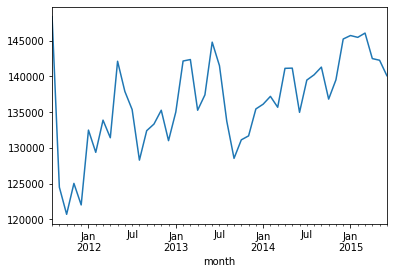

In [49]:
# Оценим влияние инфляции на стоимость 1 кв.м. на месячных таймфреймах
df['month'] = df['timestamp'].dt.to_period('M')
month_dynamic = df.groupby('month')['price_per_sq'].mean()
month_dynamic.plot();
# Очевиден прирост цен от года к году

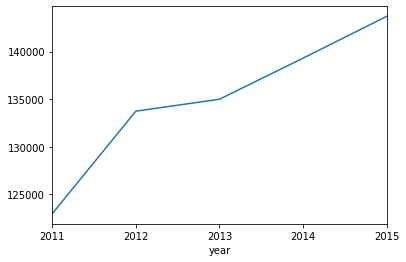

In [50]:
# На годовом графике динамика еще более очевидна:
df['year'] = df['timestamp'].dt.to_period('Y')
year_dynamic = df.groupby('year')['price_per_sq'].mean()
year_dynamic.plot();

In [51]:
#Выведем индекс помесячного изменения цен:
price_idx = (month_dynamic/month_dynamic[-1]).to_dict()
price_idx

{Period('2011-08', 'M'): 1.0589602646215175,
 Period('2011-09', 'M'): 0.8886544096313884,
 Period('2011-10', 'M'): 0.8615757135413348,
 Period('2011-11', 'M'): 0.8924577356378508,
 Period('2011-12', 'M'): 0.8709671831571142,
 Period('2012-01', 'M'): 0.9456626965935709,
 Period('2012-02', 'M'): 0.9234732471315528,
 Period('2012-03', 'M'): 0.955613634507315,
 Period('2012-04', 'M'): 0.9380349015353808,
 Period('2012-05', 'M'): 1.0144019118696581,
 Period('2012-06', 'M'): 0.9842945950395741,
 Period('2012-07', 'M'): 0.9661646720450774,
 Period('2012-08', 'M'): 0.915691948308676,
 Period('2012-09', 'M'): 0.9450819110763199,
 Period('2012-10', 'M'): 0.9517001222402418,
 Period('2012-11', 'M'): 0.9655108587740792,
 Period('2012-12', 'M'): 0.935133332828976,
 Period('2013-01', 'M'): 0.9637412285810872,
 Period('2013-02', 'M'): 1.0146564644270544,
 Period('2013-03', 'M'): 1.0161273978078507,
 Period('2013-04', 'M'): 0.9654927385399295,
 Period('2013-05', 'M'): 0.980866521454931,
 Period('2013-

In [52]:
df['price_index'] = df['month'].map(price_idx)

In [53]:
# выведем цену за 1 кв.м. без учета инфляции
df['price_per_sq_const'] = df['price_per_sq'] / df['price_index']

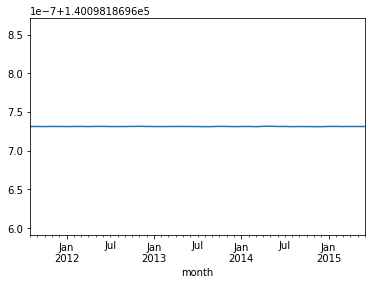

In [54]:
# Удостоверимся, что влияние инфляции нивелировано: 
df['month'] = df['timestamp'].dt.to_period('M')
agg2 = df.groupby('month')['price_per_sq_const'].mean()
agg2.plot();

In [55]:
df['price_per_sq_const']

0        128471.781400
1        166645.146311
2        125177.633159
5        152838.824689
8        142001.744236
             ...      
30466    168181.818182
30467    290697.674419
30468    154910.200000
30469    210937.500000
30470    130232.558140
Name: price_per_sq_const, Length: 24244, dtype: float64

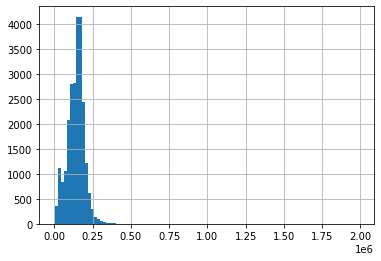

In [56]:
# посмотрим на распределение полученной переменной:
df['price_per_sq_const'].hist(bins = 100)

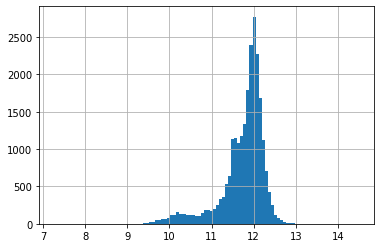

In [57]:
# улучшим распределение за счет применения функции логарифма
np.log1p(df['price_per_sq_const']).hist(bins = 100)

In [58]:
#Примем полученную переменную в качестве целевой и удалим лишние расчетные столбцы:
df['target'] = np.log1p(df['price_per_sq_const'])
df = df.drop(['price_per_sq_const', 'price_per_sq', 'price_doc', 'year', 'month'], axis = 1)

# Задание 3
Провести Exploratory Data Analysis. Проанализировать переменные, влияющие на
зависимую переменную - стоимость недвижимости price_doc.

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns

In [60]:
# по матрице корреляции отберем признаки, показавшие наибольшую линейную зависимость с целевой переменной 
df_corr = df.copy()
df_corr['target'] = df.target
correlation_matrix = df_corr.corr().round(2)
correlation_matrix

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,...,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_school_per_teacher,students_state_oneshift,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,turnover_catering_per_cap,seats_theather_rfmin_per_100000_cap,bandwidth_sports,population_reg_sports_share,apartment_build,apartment_fund_sqm,price_index,target
full_sq,1.00,0.74,0.15,0.18,-0.02,-0.01,0.78,0.02,-0.05,-0.16,0.05,-0.07,0.02,-0.06,-0.04,0.01,-0.03,-0.04,0.05,-0.04,0.03,-0.03,-0.03,0.05,0.02,0.03,0.04,0.05,0.03,0.05,-0.03,0.03,-0.03,-0.07,0.04,0.01,-0.02,-0.00,-0.02,-0.02,...,-0.10,0.12,-0.02,0.13,0.01,-0.08,-0.08,-0.05,-0.17,-0.10,0.13,-0.08,0.08,0.18,-0.13,-0.10,-0.17,0.10,0.13,0.13,0.06,0.15,0.07,0.06,0.16,-0.08,-0.15,-0.15,-0.12,-0.16,-0.17,-0.17,0.18,0.05,0.18,0.18,0.12,0.01,0.10,-0.07
life_sq,0.74,1.00,0.14,0.15,-0.05,-0.01,0.55,-0.26,-0.27,-0.48,0.19,-0.24,0.13,-0.08,-0.21,-0.04,-0.20,-0.20,0.00,-0.20,0.01,-0.07,-0.13,0.04,-0.07,0.00,0.07,0.12,-0.02,0.08,-0.06,0.05,-0.03,-0.15,0.08,0.02,-0.05,-0.02,-0.08,-0.08,...,-0.11,0.13,-0.01,0.14,-0.00,-0.08,-0.08,-0.05,-0.19,-0.11,0.15,-0.08,0.08,0.20,-0.15,-0.12,-0.19,0.10,0.16,0.15,0.08,0.19,0.08,0.07,0.18,-0.08,-0.17,-0.17,-0.14,-0.17,-0.19,-0.19,0.20,0.06,0.20,0.19,0.13,0.02,0.11,-0.11
floor,0.15,0.14,1.00,0.48,-0.01,0.00,-0.02,-0.02,-0.11,-0.20,-0.00,-0.04,0.02,-0.03,0.00,0.07,0.01,-0.00,0.09,-0.01,-0.01,-0.11,-0.07,-0.00,-0.03,0.05,0.01,0.03,0.03,-0.01,-0.06,0.08,-0.04,-0.10,-0.00,0.01,-0.02,0.03,-0.03,-0.03,...,-0.01,0.04,-0.01,0.05,0.02,-0.04,-0.04,-0.03,-0.04,-0.04,0.02,-0.04,0.04,0.04,-0.02,-0.01,-0.04,0.02,0.04,0.03,0.02,0.04,0.02,0.01,0.04,-0.01,-0.03,-0.03,-0.02,-0.05,-0.04,-0.04,0.05,0.00,0.04,0.05,0.05,-0.00,0.02,0.03
max_floor,0.18,0.15,0.48,1.00,0.04,-0.00,-0.02,0.17,-0.08,-0.15,-0.02,-0.05,0.05,-0.04,-0.01,0.09,0.00,-0.01,0.10,-0.02,-0.02,-0.15,-0.10,-0.00,-0.05,0.05,0.04,0.02,0.01,-0.03,-0.08,0.11,-0.06,-0.11,-0.01,-0.02,-0.02,0.02,-0.02,-0.02,...,-0.01,0.02,0.02,0.01,-0.01,-0.00,-0.00,0.01,-0.01,0.00,0.01,0.00,0.00,0.02,-0.01,-0.01,-0.01,0.00,0.03,0.01,-0.01,0.02,-0.00,-0.02,0.02,0.00,-0.01,-0.02,-0.02,-0.01,-0.01,-0.01,0.02,0.02,0.02,0.01,-0.01,0.02,0.02,-0.00
material,-0.02,-0.05,-0.01,0.04,1.00,-0.00,-0.05,0.15,-0.04,0.03,0.01,-0.07,0.02,-0.01,-0.08,-0.15,-0.10,-0.08,-0.14,-0.07,-0.03,0.08,0.00,0.04,0.01,-0.07,0.05,-0.02,-0.08,0.01,0.04,-0.10,0.01,0.03,-0.00,0.01,0.03,-0.05,0.03,0.03,...,0.01,0.02,0.01,-0.01,0.01,-0.00,-0.00,-0.01,0.01,-0.00,-0.01,-0.00,0.00,-0.01,0.01,0.01,0.01,0.01,0.01,0.00,-0.01,0.01,-0.01,-0.01,0.00,0.02,0.01,0.00,-0.00,0.01,0.01,0.01,-0.00,0.01,0.00,-0.01,0.01,0.01,0.00,0.01
build_year,-0.01,-0.01,0.00,-0.00,-0.00,1.00,-0.01,0.01,0.31,0.00,-0.00,0.00,-0.01,0.00,-0.00,-0.01,-0.00,0.00,-0.00,-0.00,-0.00,-0.01,0.01,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.02,-0.00,-

Линейную зависимость показали следующие признаки: life_sq, state, area_m, children_preschool, preschool_education_centers_raion, children_school, school_education_centers_raion, healthcare_centers_raion, sport_objects_raion, shopping_centers_raion



# Задание 4
Разделить датасет на обучающие и тестовую выборки

In [61]:
X = df.copy()
X = X[X.select_dtypes(include = 'number').columns]
X = X.dropna()

y = X.pop('target')

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=5)

# Задание 5
Обучить регрессионную модель предсказывать стоимость недвижимости в
зависимости от разных факторов и выявить показатели качества модели на обучающей и
тестовой выборке.

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
regr = RandomForestRegressor(n_estimators=300)
regr.fit(X_train, y_train)
pred_train = regr.predict(X_train)
pred_test = regr.predict(X_test)

In [65]:
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [66]:
print(f"Средняя абсолютная ошибка (MAE) на обучающей выборке {mean_absolute_error(y_train, pred_train)}") 
print(f"Средняя абсолютная ошибка (MAE) на тестовой выборке {mean_absolute_error(y_test, pred_test)}") 
print(f"Средняя квадратическая ошибка (MSE) на обучающей выборке {mean_squared_error(y_train, pred_train)}") 
print(f"Средняя квадратическая ошибка (MSE) на тестовой выборке {mean_squared_error(y_test, pred_test)}") 
print(f"Коэффициент детерминации (R2) на обучающей выборке {r2_score(y_train, pred_train)}") 
print(f"Коэффициент детерминации (R2) на тестовой выборке {r2_score(y_test, pred_test)}") 

Средняя абсолютная ошибка (MAE) на обучающей выборке 0.14040409397820974
Средняя абсолютная ошибка (MAE) на тестовой выборке 0.3942483829866579
Средняя квадратическая ошибка (MSE) на обучающей выборке 0.046374752094118434
Средняя квадратическая ошибка (MSE) на тестовой выборке 0.3324603463612853
Коэффициент детерминации (R2) на обучающей выборке 0.864498251130734
Коэффициент детерминации (R2) на тестовой выборке 0.03366862424050365


# Задание 6
Реализовать методы feature engineering с целью повышения метрик качества модели.

Text(0, 0.5, 'Features')

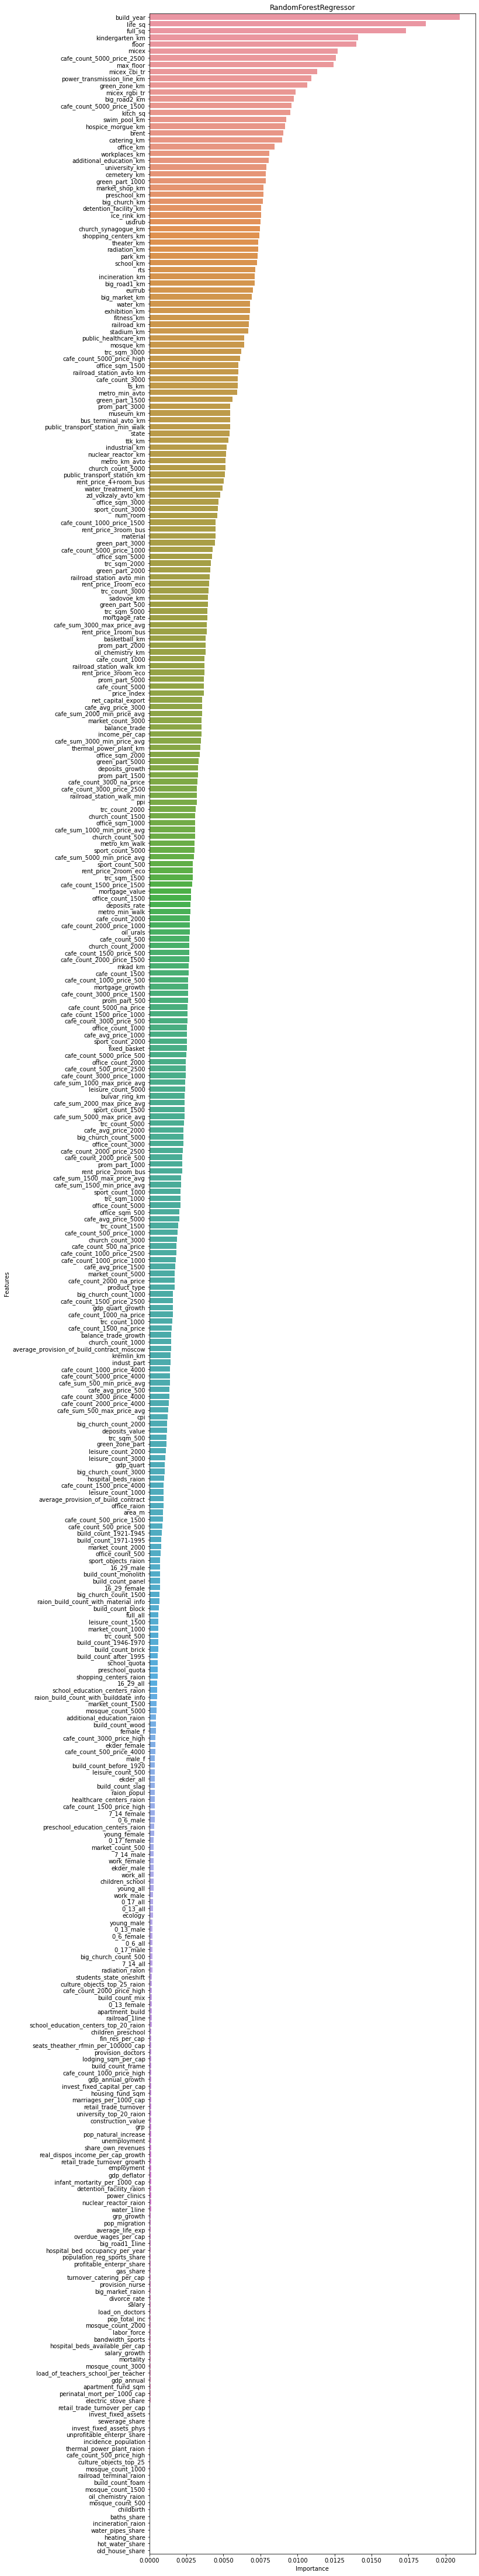

In [67]:
feature_importance = pd.DataFrame({'feature': list(X.columns), 'importance':regr.feature_importances_}).sort_values('importance', ascending = False).reset_index(drop = True)
plt.figure(figsize = (10, 80))
sns.barplot(x = feature_importance['importance'], y = feature_importance['feature'])
plt.title('RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Features')
# В результате оценки линейная зависимость признаков исходя из матрицы корреляции - не подтвердилась. 

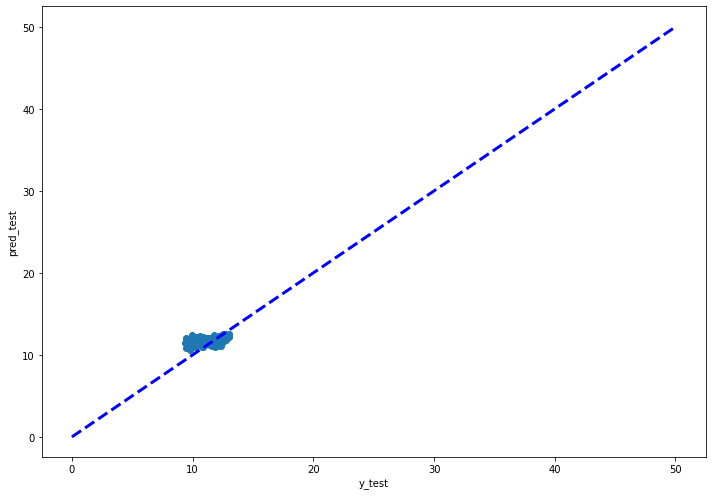

In [68]:
plt.figure(figsize = (10, 7))
plt.scatter(y_test, pred_test)
plt.plot([0,50], [0,50], '--k', color = 'blue', linewidth = 3)
plt.xlabel('y_test')
plt.ylabel('pred_test')
plt.tight_layout()
# разброс данных модели не большой

Отберем для модели набор из 10 топовых признаков с линейной связью и 10 топовых признаков по важности и произведём перерасчёт модели. Также в еще одну группу добавим гипотезу о 10 признаках, выбранных экспертно. Пусть это будут - год постройки, жилая площадь, общая площадь, удаленность от зеленой зоны, этаж, этажность, удаленность от детского сада, наличие спортивных объектов, магазинов, больниц и поликлиник и школьных учреждений. 

In [69]:
features = [['life_sq', 'state', 'area_m', 'children_preschool', 'preschool_education_centers_raion', 'children_school', 'school_education_centers_raion', \
             'healthcare_centers_raion', 'sport_objects_raion', 'shopping_centers_raion'], ['build_year', 'life_sq', 'full_sq', 'kindergarten_km', 'floor', \
            'micex', 'cafe_count_5000_price_2500', 'max_floor', 'green_zone_km', 'micex_cbi_tr'], ['build_year', 'life_sq', 'full_sq','kindergarten_km', \
            'floor', 'max_floor', 'green_zone_km','school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion', 'shopping_centers_raion']]

In [71]:
metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = X.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
  x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
  x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)

  regr = RandomForestRegressor(n_estimators=300)
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  
  metrics = metrics.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)

print(metrics)

                                            Features  MAE train  MAE test  MSE train  MSE test  R2 train   R2 test
0  [life_sq, state, area_m, children_preschool, p...   0.250615  0.428986   0.168599  0.414894  0.507374 -0.205934
1  [build_year, life_sq, full_sq, kindergarten_km...   0.144488  0.402533   0.046641  0.344949  0.863721 -0.002630
2  [build_year, life_sq, full_sq, kindergarten_km...   0.137876  0.384305   0.044232  0.326458  0.870760  0.051116


Исходя из полученных значений приходим к выводу, что гипотеза об экспертном наборе признаков может быть признана верной, т.к. даёт наилучшие показатели с точки зрения ошибки, и данный набор признаков может быть взят как наиболее влияющий на целевую переменную: ['build_year', 'life_sq', 'full_sq','kindergarten_km', \
            'floor', 'max_floor', 'green_zone_km','school_education_centers_raion', 'healthcare_centers_raion', 'sport_objects_raion', 'shopping_centers_raion']